In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Access kaggle on colab and autentication
!mkdir ~/.kaggle/
!echo '{"username":"jodbaka","key":"ac92b2f181214836bdd9aa642117ca39"}' > ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#downloading files only use #nt names
!kaggle competitions download -c cassava-disease

  0% 0.00/645k [00:00<?, ?B/s]
100% 645k/645k [00:00<00:00, 44.4MB/s]
100% 1.04G/1.04G [00:11<00:00, 101MB/s] 
100% 1.04G/1.04G [00:11<00:00, 98.0MB/s]
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 72.2MB/s]
 99% 769M/777M [00:08<00:00, 86.3MB/s]
100% 777M/777M [00:08<00:00, 90.9MB/s]
100% 514M/515M [00:08<00:00, 37.9MB/s]
100% 515M/515M [00:08<00:00, 65.1MB/s]


In [ ]:
# unzip files    #cptr helps not to print all unzip files
#%%capture 
!unzip train.zip
!unzip test.zip
!unzip extraimages.zip

Streaming output truncated to the last 5000 lines.
  inflating: extraimages/extra-image-12082.jpg  
  inflating: extraimages/extra-image-15935.jpg  
  inflating: extraimages/extra-image-5819.jpg  
  inflating: extraimages/extra-image-4050.jpg  
  inflating: extraimages/extra-image-2421.jpg  
  inflating: extraimages/extra-image-15262.jpg  
  inflating: extraimages/extra-image-6647.jpg  
  inflating: extraimages/extra-image-9574.jpg  
  inflating: extraimages/extra-image-7559.jpg  
  inflating: extraimages/extra-image-1896.jpg  
  inflating: extraimages/extra-image-9212.jpg  
  inflating: extraimages/extra-image-15504.jpg  
  inflating: extraimages/extra-image-5428.jpg  
  inflating: extraimages/extra-image-2347.jpg  
  inflating: extraimages/extra-image-3059.jpg  
  inflating: extraimages/extra-image-13175.jpg  
  inflating: extraimages/extra-image-4736.jpg  
  inflating: extraimages/extra-image-884.jpg  
  inflating: extraimages/extra-image-15510.jpg  
  inflating: extraimages/extra-i

In [ ]:
# Libraries 
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import  DataLoader, WeightedRandomSampler, SubsetRandomSampler 
import matplotlib.pyplot as plt
import time
import os
import copy

print("Pytorch Version: ",torch.__version__)
print("Torchvision Version ",torchvision.__version__)

Pytorch Version:  1.4.0
Torchvision Version  0.5.0


In [ ]:
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


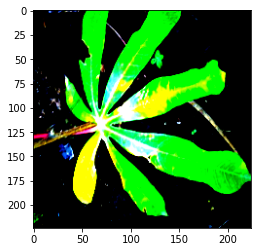

1 cbsd


In [ ]:
# Loading the datasets and plot some images
dataset = datasets.ImageFolder('train',transform=train_transform)
img,label = dataset[500]
plt.imshow(img.permute(2,1,0))
plt.show()
print(label, dataset.classes[label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']
dataset size:  5656


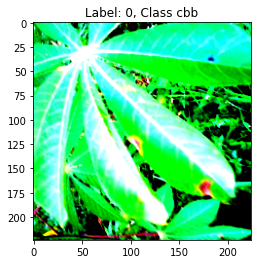

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


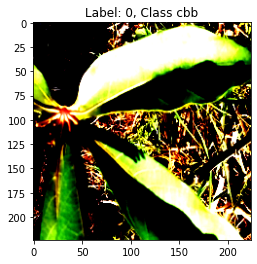

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


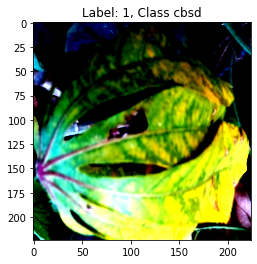

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


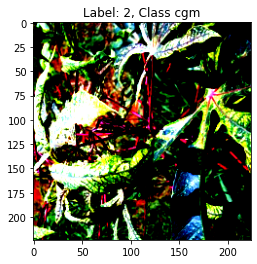

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


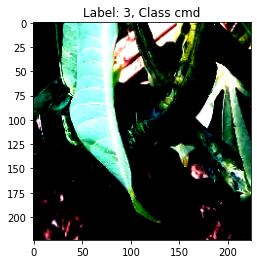

In [ ]:
# Access different directories in train ( class name), 
print(dataset.classes)
print('dataset size: ', len(dataset))
class_names = dataset.classes

for i in 0, 100, 1000, 2000, 5000:
  img,label = dataset[i]
  plt.title(f'Label: {label}, Class {class_names[label]}')
  plt.imshow(img.permute(2,1,0))
  plt.show()

In [ ]:
# list of all labels
labels = dataset.targets
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
# unique element
my_list = [2,3,5,6,6,7]
np.unique(my_list)

array([2, 3, 5, 6, 7])

In [ ]:
# unique elts and count
#labels = dataset.targets
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 466, 1443,  773, 2658,  316]))

In [ ]:
#
_,labels_count = np.unique(labels, return_counts=True)
labels_count

array([ 466, 1443,  773, 2658,  316])

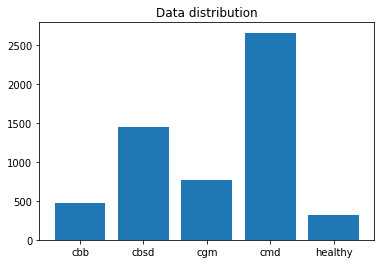

In [ ]:
# viewing datasets distribution
plt.title('Data distribution')
plt.bar(class_names, labels_count)
plt.show()

In [ ]:
# view percentage of each class
distribution_perc = 100*labels_count/len(dataset)
distribution_perc.round(1)

array([ 8.2, 25.5, 13.7, 47. ,  5.6])

In [ ]:
#size of dataset
dataset_size = len(dataset)

distribution_perc = 100*labels_count/dataset_size

for class_name, count, distrib in zip(class_names,labels_count,distribution_perc):
  print(f'{class_name} {distrib:.2f}% - {count} Images')
print('Total Images:',dataset_size,'Images')

cbb 8.24% - 466 Images
cbsd 25.51% - 1443 Images
cgm 13.67% - 773 Images
cmd 46.99% - 2658 Images
healthy 5.59% - 316 Images
Total Images: 5656 Images


In [ ]:
#spllit each class into 20% for test and 80% for train bcz all have #nt size
from sklearn.model_selection import train_test_split

#split train and test
train_idx, valid_idx = train_test_split(
    np.arange(dataset_size),
    test_size = 0.1,
    shuffle = True,
    stratify = labels  # take uniform distribution of each class
)

In [ ]:
# test if all dataset are split well
labelss = np.array(labels)
_,valid_dist = np.unique(labelss[valid_idx], return_counts=True)
valid_dist

array([ 47, 144,  77, 266,  32])

In [ ]:
labels_count

array([ 466, 1443,  773, 2658,  316])

In [ ]:
# SubsetRandomSampler(Help to split our data randomly or shuffled) 

batch_size = 64

#draw samples from datasets
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler) #shuffle=True)
valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)
train_size = batch_size*len(train_loader)
test_size = batch_size*len(valid_loader)

NameError: ignored

In [ ]:
# Define first model
model = models.resnet50(pretrained=True) 
# model = models.resnext50_32x4d(pretrained=True)
# model = models.vgg19(pretrained=True) 
#model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
# how model looks like "Architecture"
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# view last input channels
in_features = model.fc.in_features
in_features

2048

In [ ]:
#lock previous layer
for param in model.parameters():
  param.requires_grad = False

In [ ]:
fc_layers = nn.Sequential(nn.Linear(2048,512),
              nn.ReLU(),
              nn.Linear(512,5)
              )

In [ ]:
# change last layer to be the same as our output class
model.fc = fc_layers

In [ ]:
# view the new model
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
print('Number of parameters: {:,}'.format(sum([p.numel() for p in model.fc.parameters()])) )

Number of parameters: 1,051,653


In [ ]:
# put model to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model = model.to(device)

In [ ]:
# loss function
criteration = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.15)

# param.requires_grad = False
valid_loss_min = np.inf
for epoch in range(40):
  print(f'epoch {epoch+1}')
  number_corect = 0
  sum_loss = 0
  for datas, targets in train_loader:
    datas = datas.to(device)
    targets = targets.to(device)

    optimizer.zero_grad()

    #predict
    outputs = model(datas)

    #update model
    loss = criteration(outputs, targets)

    #update model
    loss.backward()
    optimizer.step()
##
    #compute metrics
    max_index = outputs.max(dim=1)[1]
    sum_loss +=loss.item()
    number_corect += (max_index == targets.data).sum()

  #print metrics
  loss = sum_loss / len(train_loader)
  accuracy = 100.0*number_corect / train_size

  print(f'Loss {loss}, Accuracy {accuracy}')
  number_corect = 0
  sum_loss = 0
  with torch.no_grad():
    correct = 0
    for i, (batch, targets) in enumerate(valid_loader):

        # batch and targets to cuda 
        batch = batch.cuda()
        targets = targets.cuda()
    
        # forward 
        outputs = model(batch)
        loss = criteration(outputs, targets)

        # compute accuracy 
        max_index = outputs.max(dim=1)[1]
        sum_loss +=loss.item()
        number_corect += (max_index == targets.data).sum()

    #print metrics
    loss = sum_loss / len(valid_loader)
    accuracy = 100.0*number_corect / test_size
    valid_loss = loss
    if epoch % 1 == 0 and valid_loss <= valid_loss_min:
      torch.save(model.state_dict(), '/content/drive/My Drive/Casssava/state_dict_{}.pt')
      print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
      valid_loss_min = valid_loss

    print(f'Test loss {loss}, Test accuracy {accuracy}')


epoch 1
Loss 0.6295747769065201, Accuracy 76.46484375
Validation loss decreased (inf --> 2.032594). Saving model ...
Test loss 2.0325939655303955, Test accuracy 55.20833206176758
epoch 2
Loss 0.6779989466071129, Accuracy 75.5078125
Validation loss decreased (2.032594 --> 0.752286). Saving model ...
Test loss 0.7522858927647272, Test accuracy 71.00694274902344
epoch 3
Loss 0.625990547426045, Accuracy 76.9140625
Test loss 2.2238542834917703, Test accuracy 45.65972137451172
epoch 4
Loss 0.6329553563147783, Accuracy 76.85546875
Validation loss decreased (0.752286 --> 0.664975). Saving model ...
Test loss 0.664975161353747, Test accuracy 77.43055725097656
epoch 5
Loss 0.6194440122693777, Accuracy 77.1875
Test loss 9.409474107954237, Test accuracy 25.34722328186035
epoch 6
Loss 0.7056920373812318, Accuracy 76.15234375
Test loss 1.3422632416089375, Test accuracy 57.8125
epoch 7
Loss 0.6442740967497229, Accuracy 76.2109375
Test loss 27.61978054046631, Test accuracy 8.159722328186035
epoch 8
Lo

In [ ]:
# need to load the saved model first before you start training
model.load_state_dict(torch.load('/content/drive/My Drive/Casssava/state_dict_{}.pt'))

model = model.eval()

#When you want to retrain your modle replace eval with train(). and for evaluation use eval()


In [ ]:
# To do the test

test_transform = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
# Test Loader

test_dataset = datasets.ImageFolder('test', transform = test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
#makes prediction
predictions = []

with torch.no_grad():
  for datas, _ in test_loader:
    datas = datas.to(device)
    #prdict
    outputs = model(datas)
    _, max_indices = torch.max(outputs, 1)
    #save predict
    predictions.append(max_indices.cpu())

In [ ]:
predictions

[tensor([1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 4, 3, 3, 1, 3, 1, 1, 3, 4, 2, 3, 1,
         3, 4, 0, 3, 1, 1, 1, 1]),
 tensor([3, 1, 3, 3, 3, 1, 1, 4, 1, 3, 1, 1, 0, 1, 4, 3, 3, 3, 3, 0, 2, 1, 2, 3,
         3, 1, 1, 1, 3, 1, 3, 0]),
 tensor([3, 3, 4, 3, 4, 0, 1, 2, 4, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3,
         3, 1, 3, 3, 3, 3, 1, 1]),
 tensor([4, 1, 3, 0, 1, 3, 3, 3, 4, 3, 1, 3, 3, 1, 2, 3, 1, 3, 3, 1, 3, 3, 4, 3,
         1, 3, 3, 3, 3, 4, 3, 3]),
 tensor([3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 1, 1, 3, 2, 3, 3, 2, 1, 3, 2, 3, 1, 1, 1,
         3, 3, 3, 3, 3, 1, 3, 1]),
 tensor([1, 1, 1, 3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 3, 1, 0, 2, 1, 1, 3, 3, 3, 1, 1,
         2, 3, 1, 3, 1, 3, 1, 2]),
 tensor([3, 2, 1, 1, 1, 1, 3, 0, 3, 2, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3,
         1, 1, 3, 0, 0, 3, 1, 3]),
 tensor([3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 2, 4, 1, 1, 1, 3, 3, 1, 4, 3, 1, 1, 3, 1,
         3, 2, 3, 3, 3, 3, 4, 4]),
 tensor([4, 3, 3, 2, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 4, 1, 1, 3, 3, 1, 

In [ ]:
# Concatenate tensor
predictions = torch.cat(predictions)
predictions

tensor([1, 1, 3,  ..., 2, 3, 3])

In [ ]:
#Transform to arry
class_names = np.array(class_names)
predicted_class = class_names[predictions]
predicted_class

array(['cbsd', 'cbsd', 'cmd', ..., 'cgm', 'cmd', 'cmd'], dtype='<U7')

In [ ]:
# To give the Id of the images
filnames = [filname[7:] for filname, _ in test_dataset.imgs]


In [ ]:
 # To create the data frame
 import pandas as pd

submission = pd.DataFrame.from_dict({'Category': predicted_class, 'Id': filnames})

submission

,Category,Id
0,cbsd,test-img-0.jpg
1,cbsd,test-img-1.jpg
2,cmd,test-img-10.jpg
3,cmd,test-img-100.jpg
4,cbsd,test-img-1000.jpg
...,...,...
3769,cmd,test-img-995.jpg
3770,cmd,test-img-996.jpg
3771,cgm,test-img-997.jpg
3772,cmd,test-img-998.jpg


In [ ]:
# To create the CSV file

submission.to_csv('joram_my_submission.csv', header = True, index = False)

In [ ]:
!kaggle competitions submit -c ammi-2020-convnets -f joram_my_submission.csv -m 'jbacker_Jobs'

100% 81.7k/81.7k [00:04<00:00, 18.9kB/s]
Successfully submitted to Cassava Disease Classification